## Importing Libraries

In [1]:
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import plot_tree

#cross validation
from sklearn.model_selection import train_test_split

## Importing Data

In [2]:
data=pd.read_csv("customer data.csv") 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data Model-- Linear Regression (Undiscretized Limit Balance)

## Selecting Data

In [4]:
#features--independent variables
X = data[['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1
1,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,2.0,1
2,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         30000 non-null  int64  
 1   EDUCATION                   30000 non-null  int64  
 2   MARRIAGE                    30000 non-null  int64  
 3   AGE                         30000 non-null  int64  
 4   PAY_0                       30000 non-null  float64
 5   PAY_2                       30000 non-null  float64
 6   PAY_3                       30000 non-null  float64
 7   PAY_4                       30000 non-null  float64
 8   PAY_5                       30000 non-null  float64
 9   PAY_6                       30000 non-null  float64
 10  default payment next month  30000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.5 MB


In [6]:
#dependent variable
y = data['LIMIT_BAL']
print(y)

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64


In [7]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         21000 non-null  int64  
 1   EDUCATION                   21000 non-null  int64  
 2   MARRIAGE                    21000 non-null  int64  
 3   AGE                         21000 non-null  int64  
 4   PAY_0                       21000 non-null  float64
 5   PAY_2                       21000 non-null  float64
 6   PAY_3                       21000 non-null  float64
 7   PAY_4                       21000 non-null  float64
 8   PAY_5                       21000 non-null  float64
 9   PAY_6                       21000 non-null  float64
 10  default payment next month  21000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.9 MB


## Data Models

In [117]:
algos_Class = []
algos_Class.append(('Random Forest Regressor', RandomForestRegressor()))
algos_Class.append(('Linear Regression', LinearRegression()))
algos_Class.append(('Support Vector Regression', SVR()))
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [118]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.15872790317724247
Linear Regression 0.17294604036062508
Support Vector Regression -0.05457584440871558


In [10]:
#Modeling (Linear Regression)
lr_algo=LinearRegression()
lr_model=lr_algo.fit(X_train,y_train)
#Prediction
lr_preds=lr_algo.predict(X_test)

In [14]:
#Print result of RMSE
rmse=np.sqrt(mean_squared_error(y_test,lr_preds))
print('Linear Regression Model')
print('RMSE: %.3f' % rmse)
#Print result of R2 Squared
predRsquared=r2_score(y_test,lr_preds)
print('R Squared: %.3f' % predRsquared)

Linear Regression Model
RMSE: 117396.865
R Squared: 0.168


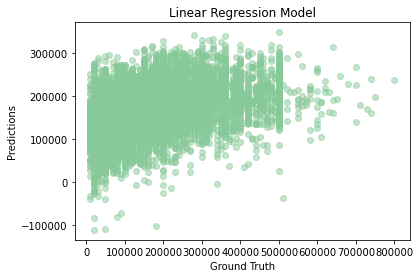

In [12]:
plt.scatter(y_test, lr_preds, alpha = 0.5,color = '#88c999')
plt.title('Linear Regression Model',color = 'black')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [123]:
#Modeling (Random Forest Regressor)
rfr_algo=RandomForestRegressor()
rfr_model=rfr_algo.fit(X_train,y_train)
#Prediction
rfr_preds=rfr_algo.predict(X_test)

In [124]:
#Print result of RMSE
rmse=np.sqrt(mean_squared_error(y_test,rfr_preds))
print('RMSE: %.3f' % rmse)

RMSE: 118125.001


In [125]:
#Print result of R2 Squared
predRsquared=r2_score(y_test,rfr_preds)
print('R Squared: %.3f' % predRsquared)

R Squared: 0.157


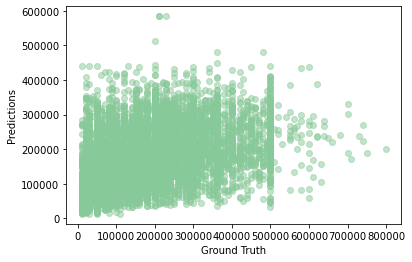

In [126]:
plt.scatter(y_test, rfr_preds, alpha = 0.5,color = '#88c999')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [127]:
#Modeling (Support Vector Regression)
svr_algo=SVR()
svr_model=svr_algo.fit(X_train,y_train)
#Prediction
svr_preds=svr_algo.predict(X_test)

In [128]:
#Print result of RMSE
rmse=np.sqrt(mean_squared_error(y_test,svr_preds))
print('RMSE: %.3f' % rmse)

RMSE: 131315.644


In [129]:
#Print result of R2 Squared
predRsquared=r2_score(y_test,svr_preds)
print('R Squared: %.3f' % predRsquared)

R Squared: -0.041


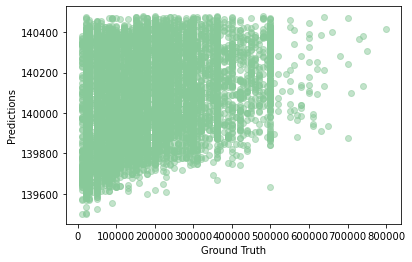

In [130]:
plt.scatter(y_test, svr_preds, alpha = 0.5,color = '#88c999')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Data Model-- Classification (Discretized Limit Balance)

## Including payment attributes

In [15]:
#features--independent variables
X.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1
1,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,2.0,1
2,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         30000 non-null  int64  
 1   EDUCATION                   30000 non-null  int64  
 2   MARRIAGE                    30000 non-null  int64  
 3   AGE                         30000 non-null  int64  
 4   PAY_0                       30000 non-null  float64
 5   PAY_2                       30000 non-null  float64
 6   PAY_3                       30000 non-null  float64
 7   PAY_4                       30000 non-null  float64
 8   PAY_5                       30000 non-null  float64
 9   PAY_6                       30000 non-null  float64
 10  default payment next month  30000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.5 MB


In [17]:
y.head()

0     20000.0
1    120000.0
2     90000.0
3     50000.0
4     50000.0
Name: LIMIT_BAL, dtype: float64

In [18]:
## Discretizing limit balance and using it as a dependent variable
## Bins=5
data['disLimit']=pd.qcut(data['LIMIT_BAL'],5,labels=False)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,disLimit
0,1,20000.0,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,2,120000.0,2,2,2,26,-1.0,2.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,3,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [19]:
#dependent variable
y = data['disLimit']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: disLimit, dtype: int64

In [20]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [21]:
#Modeling (Classification)
dtc_algo = DecisionTreeClassifier(max_depth=5)
dtc_model = dtc_algo.fit(X_train,y_train)
#Predictions
dtc_preds = dtc_model.predict(X_test)
print("Decision Tree Classifier with Bins=5")
print(classification_report(y_test, dtc_preds))

Decision Tree Classifier with Bins=5
              precision    recall  f1-score   support

           0       0.46      0.64      0.54      2301
           1       0.27      0.07      0.11      1468
           2       0.24      0.36      0.29      1798
           3       0.16      0.01      0.01      1693
           4       0.37      0.55      0.44      1740

    accuracy                           0.35      9000
   macro avg       0.30      0.33      0.28      9000
weighted avg       0.31      0.35      0.30      9000



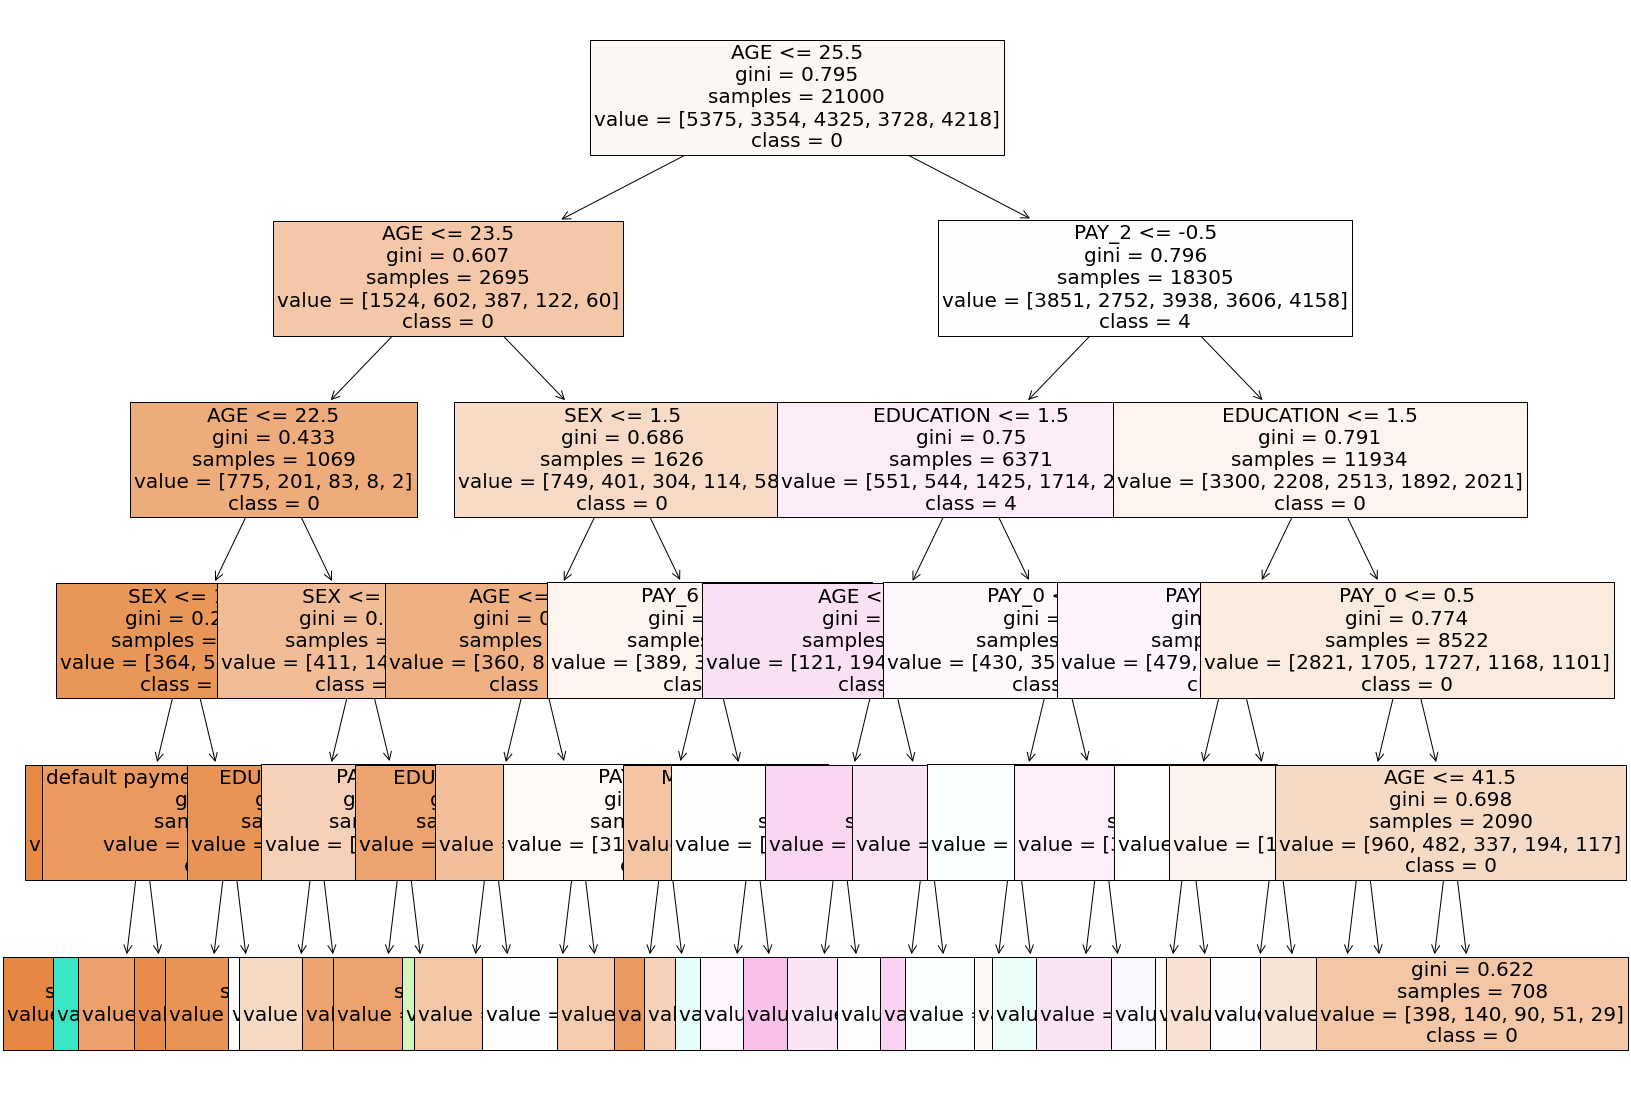

In [139]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc_model, feature_names=X.columns,class_names=['0', '1', '2', '3','4'], filled=True,fontsize=20)

In [140]:
##Random Forest Classifier
rfc_algo = RandomForestClassifier()
rfc_model = rfc_algo.fit(X_train,y_train)
#Predictions
rfc_preds = rfc_model.predict(X_test)
print("Random Forest Classifier with Bins=5")
print(classification_report(y_test, rfc_preds))

Random Forest Classifier with Bins=5
              precision    recall  f1-score   support

           0       0.47      0.55      0.51      2301
           1       0.23      0.18      0.20      1468
           2       0.22      0.22      0.22      1798
           3       0.27      0.23      0.25      1693
           4       0.32      0.37      0.34      1740

    accuracy                           0.33      9000
   macro avg       0.30      0.31      0.30      9000
weighted avg       0.32      0.33      0.32      9000



## Excluding payment attributes

In [141]:
#features--independent variables
X = data[['SEX','EDUCATION','MARRIAGE','AGE','default payment next month']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,2,2,1,24,1
1,2,2,2,26,1
2,2,2,2,34,0
3,2,2,1,37,0
4,1,2,1,57,0


In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   SEX                         30000 non-null  int64
 1   EDUCATION                   30000 non-null  int64
 2   MARRIAGE                    30000 non-null  int64
 3   AGE                         30000 non-null  int64
 4   default payment next month  30000 non-null  int64
dtypes: int64(5)
memory usage: 1.1 MB


In [143]:
#dependent variable
y.head()

0    0
1    2
2    1
3    0
4    0
Name: disLimit, dtype: int64

In [144]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [145]:
#Decision Tree Classifier
dtc_algo = DecisionTreeClassifier(max_depth=5)
dtc_model = dtc_algo.fit(X_train,y_train)
#Predictions
dtc_preds = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_preds))

              precision    recall  f1-score   support

           0       0.39      0.78      0.52      2301
           1       0.00      0.00      0.00      1468
           2       0.24      0.27      0.25      1798
           3       0.00      0.00      0.00      1693
           4       0.35      0.48      0.41      1740

    accuracy                           0.34      9000
   macro avg       0.20      0.30      0.24      9000
weighted avg       0.21      0.34      0.26      9000



C:\Users\Romita\anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Romita\anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Romita\anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


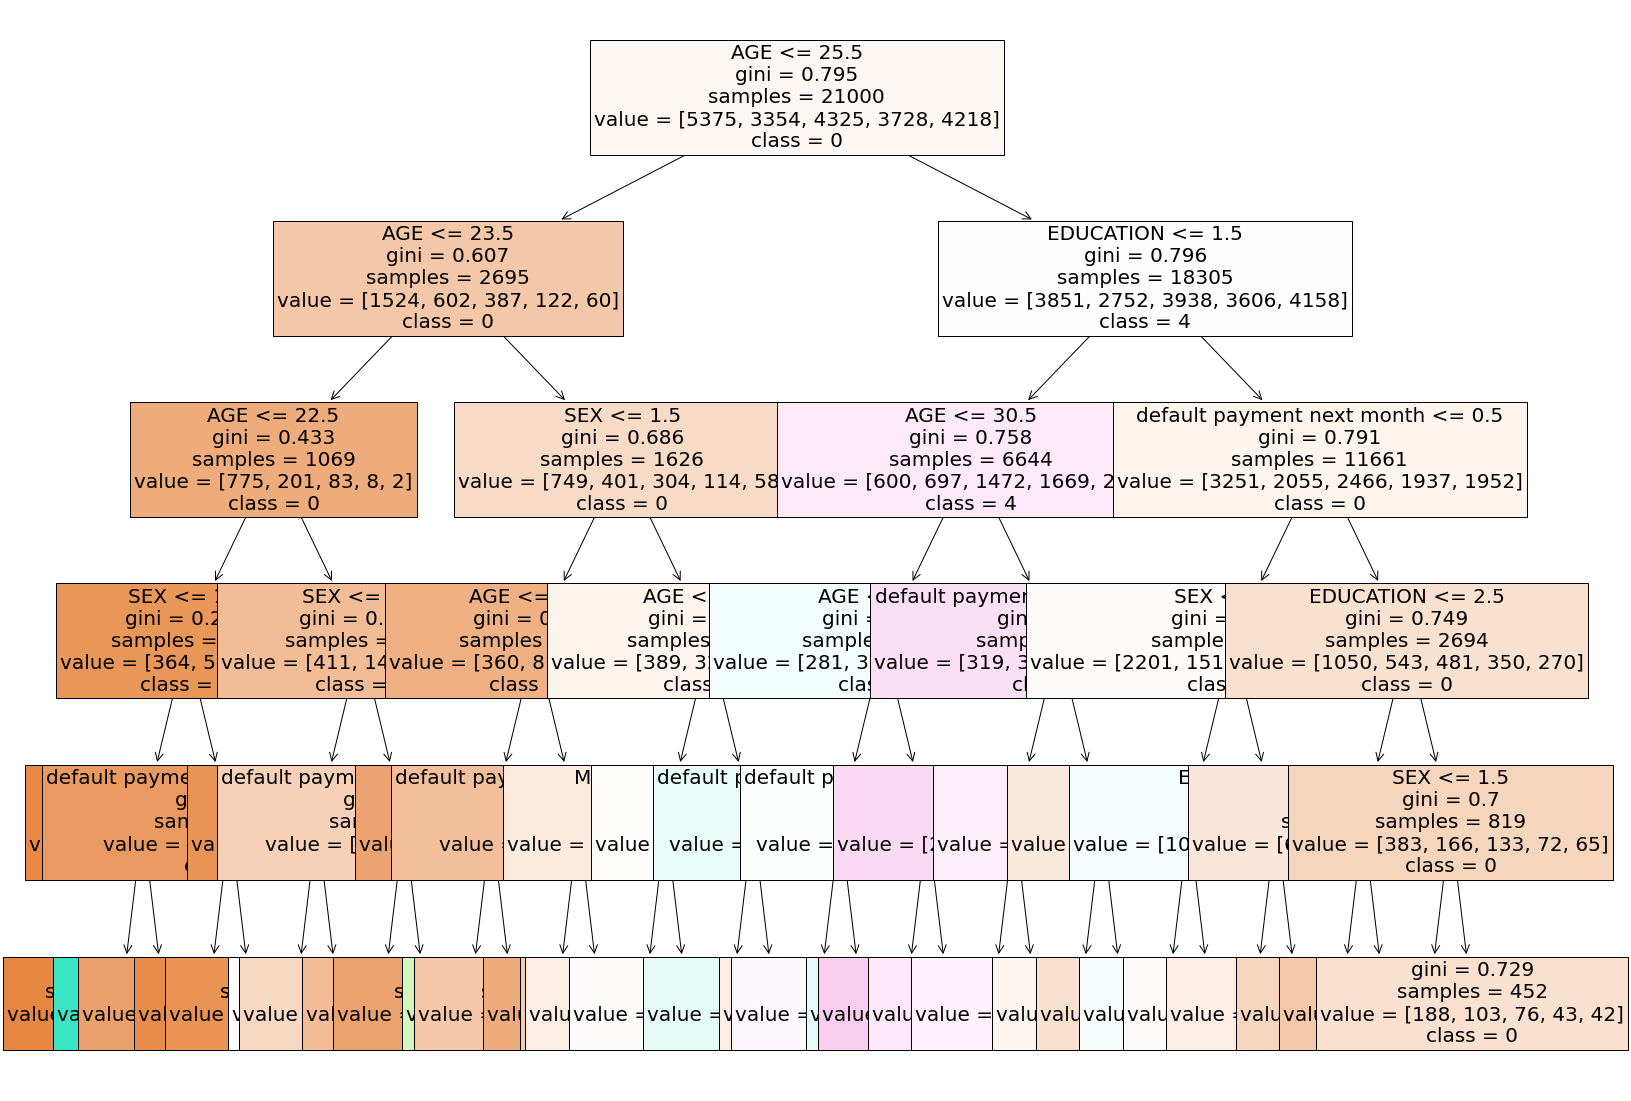

In [146]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc_model, feature_names=X.columns,class_names=['0', '1', '2', '3','4'], filled=True,fontsize=20)

In [147]:
##Random Forest Classifier
rfc_algo = RandomForestClassifier()
rfc_model = rfc_algo.fit(X_train,y_train)
#Predictions
rfc_preds = rfc_model.predict(X_test)
print("Random Forest Classifier with Bins=5")
print(classification_report(y_test, rfc_preds))

Random Forest Classifier with Bins=5
              precision    recall  f1-score   support

           0       0.44      0.59      0.50      2301
           1       0.24      0.13      0.17      1468
           2       0.24      0.22      0.23      1798
           3       0.24      0.12      0.16      1693
           4       0.32      0.47      0.38      1740

    accuracy                           0.33      9000
   macro avg       0.30      0.31      0.29      9000
weighted avg       0.31      0.33      0.31      9000



# Data Model-- Classification (Payment Default)

## Including payment attributes

In [22]:
#features--independent variables
X = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000.0,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,120000.0,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,2.0
2,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0


In [23]:
#dependent variable
y = data['default payment next month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [24]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [25]:
#Decision Tree Classifier
dtc_algo_default = DecisionTreeClassifier(max_depth=3)
dtc_model_default = dtc_algo_default.fit(X_train,y_train)
#Predictions
dtc_preds_default = dtc_model_default.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, dtc_preds_default))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



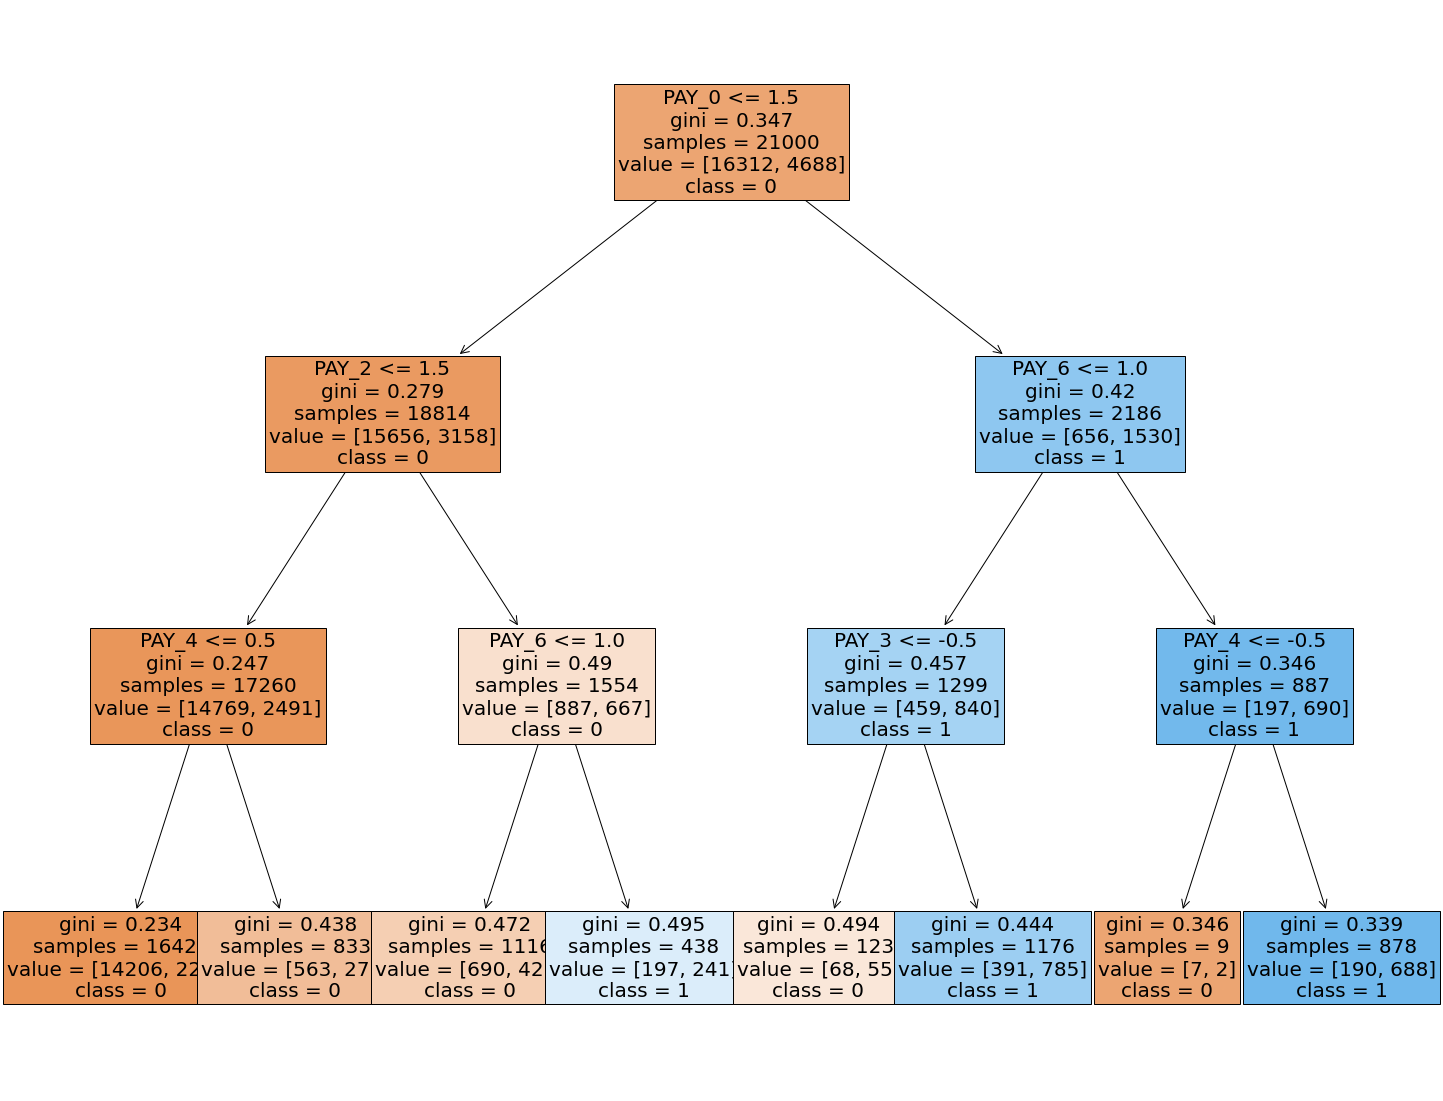

In [152]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc_model_default, feature_names=X.columns,class_names=['0', '1'], filled=True,fontsize=20)

In [153]:
##Random Forest Classifier
rfc_algo_default = RandomForestClassifier()
rfc_model_default = rfc_algo_default.fit(X_train,y_train)
#Predictions
rfc_preds_default = rfc_model_default.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, rfc_preds_default))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7052
           1       0.54      0.38      0.45      1948

    accuracy                           0.80      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.78      0.80      0.78      9000



## Excluding payment attributes

In [26]:
#features--independent variables
X = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000.0,2,2,1,24
1,120000.0,2,2,2,26
2,90000.0,2,2,2,34
3,50000.0,2,2,1,37
4,50000.0,1,2,1,57


In [27]:
#dependent variable
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [29]:
#Decision Tree Classifier
dtc_algo_default = DecisionTreeClassifier(max_depth=5)
dtc_model_default = dtc_algo_default.fit(X_train,y_train)
#Predictions
dtc_preds_default = dtc_model_default.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, dtc_preds_default))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.27      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.53      0.50      0.44      9000
weighted avg       0.67      0.78      0.69      9000



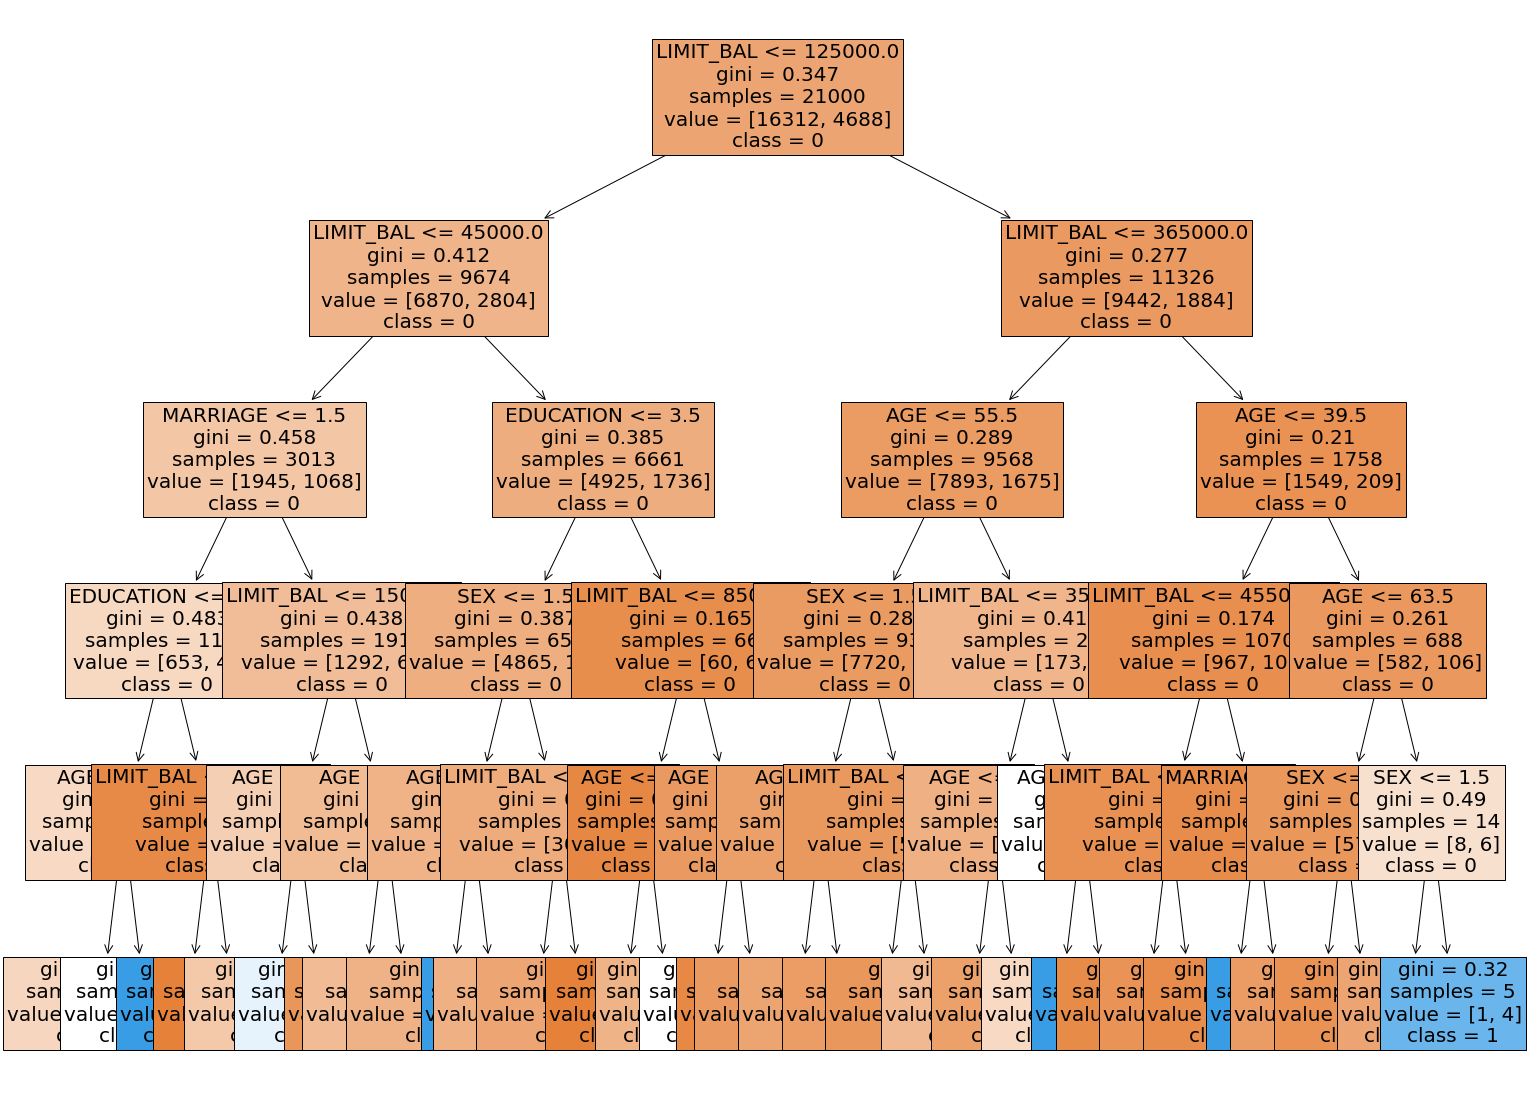

In [158]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc_model_default, feature_names=X.columns,class_names=['0', '1'], filled=True,fontsize=20)

In [159]:
##Random Forest Classifier
rfc_algo_default = RandomForestClassifier()
rfc_model_default = rfc_algo_default.fit(X_train,y_train)
#Predictions
rfc_preds_default = rfc_model_default.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, rfc_preds_default))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      7052
           1       0.27      0.14      0.19      1948

    accuracy                           0.73      9000
   macro avg       0.53      0.52      0.51      9000
weighted avg       0.68      0.73      0.70      9000



## Only payment attributes

In [30]:
#features--independent variables
X = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0


In [31]:
#dependent variable
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [32]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [33]:
#Decision Tree Classifier
dtc_algo_default = DecisionTreeClassifier(max_depth=5)
dtc_model_default = dtc_algo_default.fit(X_train,y_train)
#Predictions
dtc_preds_default = dtc_model_default.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, dtc_preds_default))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



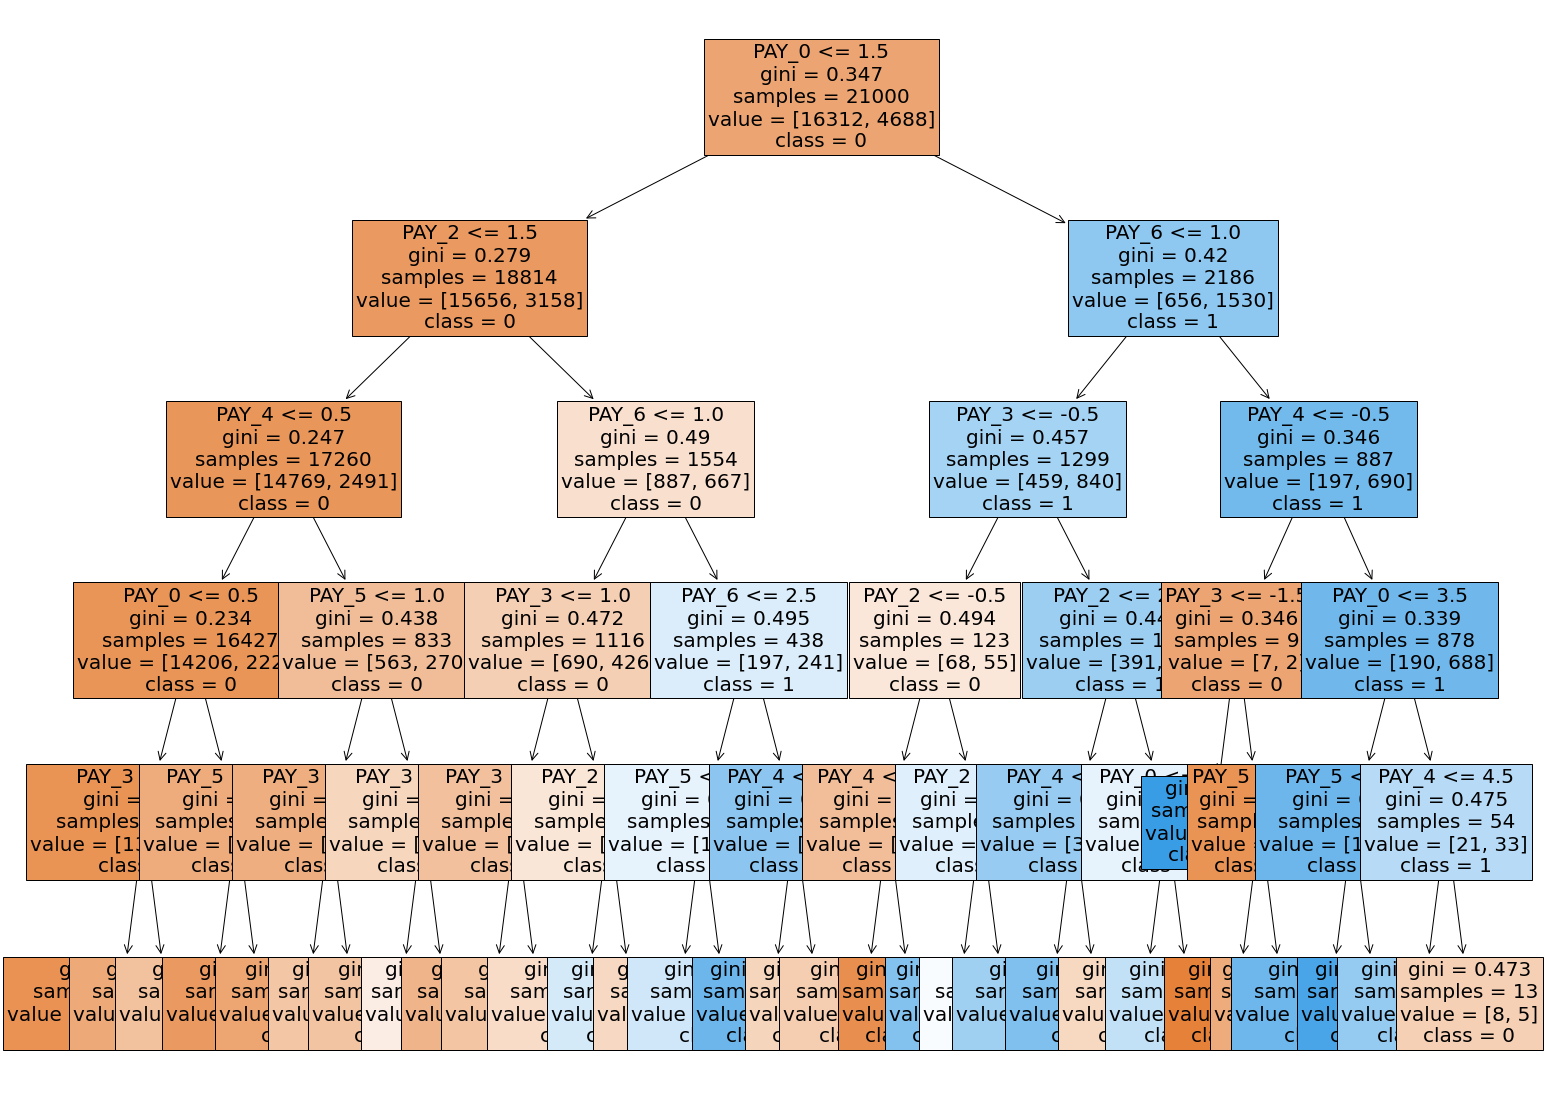

In [164]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc_model_default, feature_names=X.columns,class_names=['0', '1'], filled=True,fontsize=20)

In [165]:
##Random Forest Classifier
rfc_algo_default = RandomForestClassifier()
rfc_model_default = rfc_algo_default.fit(X_train,y_train)
#Predictions
rfc_preds_default = rfc_model_default.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, rfc_preds_default))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.61      0.36      0.46      1948

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

